## Imports

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import os

## Data Loading

In [47]:
# Load Wine Quality dataset from UCI repository
# This is a multiclass classification problem with imbalanced classes
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')
wine_data.head()

if not os.path.exists("../data"):
    os.makedirs("../data")

# Create binary classification: good wine (quality >= 6) vs bad wine (quality < 6)
# Or keep multiclass for harder challenge
wine_data['quality_category'] = pd.cut(wine_data['quality'], 
                                        bins=[0, 5, 6, 10], 
                                        labels=['low', 'medium', 'high'])\
                                            .drop(columns=['quality'])

wine_data.to_csv("../data/wine_quality.csv", index=False)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


## Exploratory Data Analysis (EDA)

In [48]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   int64   
 12  quality_category      1599 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 151.7 KB


### Missing Values & Duplicates

In [49]:
n_na = wine_data.isna().sum()
print("Missing Values : ")
print(n_na)
print("🚫 I don't drop the NAN i will Impute them later... ")
n_duplicates = wine_data.duplicated().sum()
print(f"duplicates : {n_duplicates}")
wine_data.drop_duplicates(inplace=True)
print("✅ Duplicates have been dropped.")

Missing Values : 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_category        0
dtype: int64
🚫 I don't drop the NAN i will Impute them later... 
duplicates : 240
✅ Duplicates have been dropped.


### Visualizations
#### Univariate Analysis

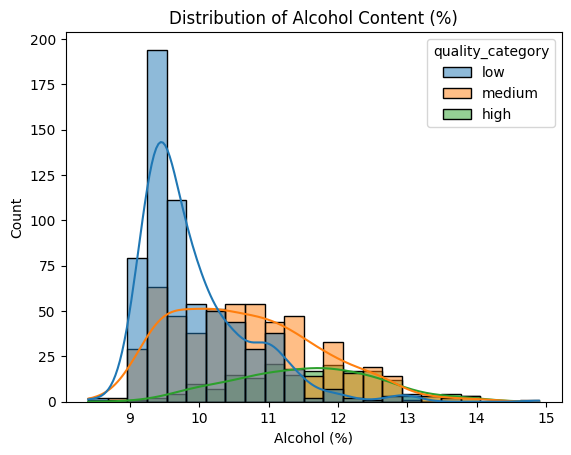

In [50]:
# For 1 column
sns.histplot(data=wine_data, x="alcohol", kde=True, hue="quality_category")
plt.title("Distribution of Alcohol Content (%)")
plt.xlabel("Alcohol (%)")
plt.ylabel("Count")
plt.show()

## Multivariate Analysis

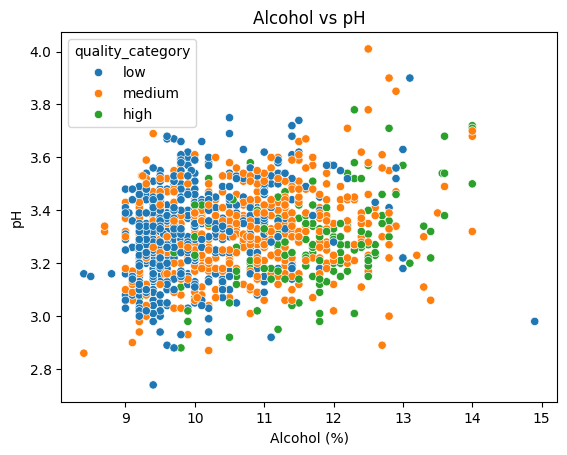

In [51]:
sns.scatterplot(data=wine_data, x="alcohol", y="pH", hue="quality_category")
plt.title("Alcohol vs pH")
plt.xlabel("Alcohol (%)")
plt.ylabel("pH")
plt.show()

In [52]:
##

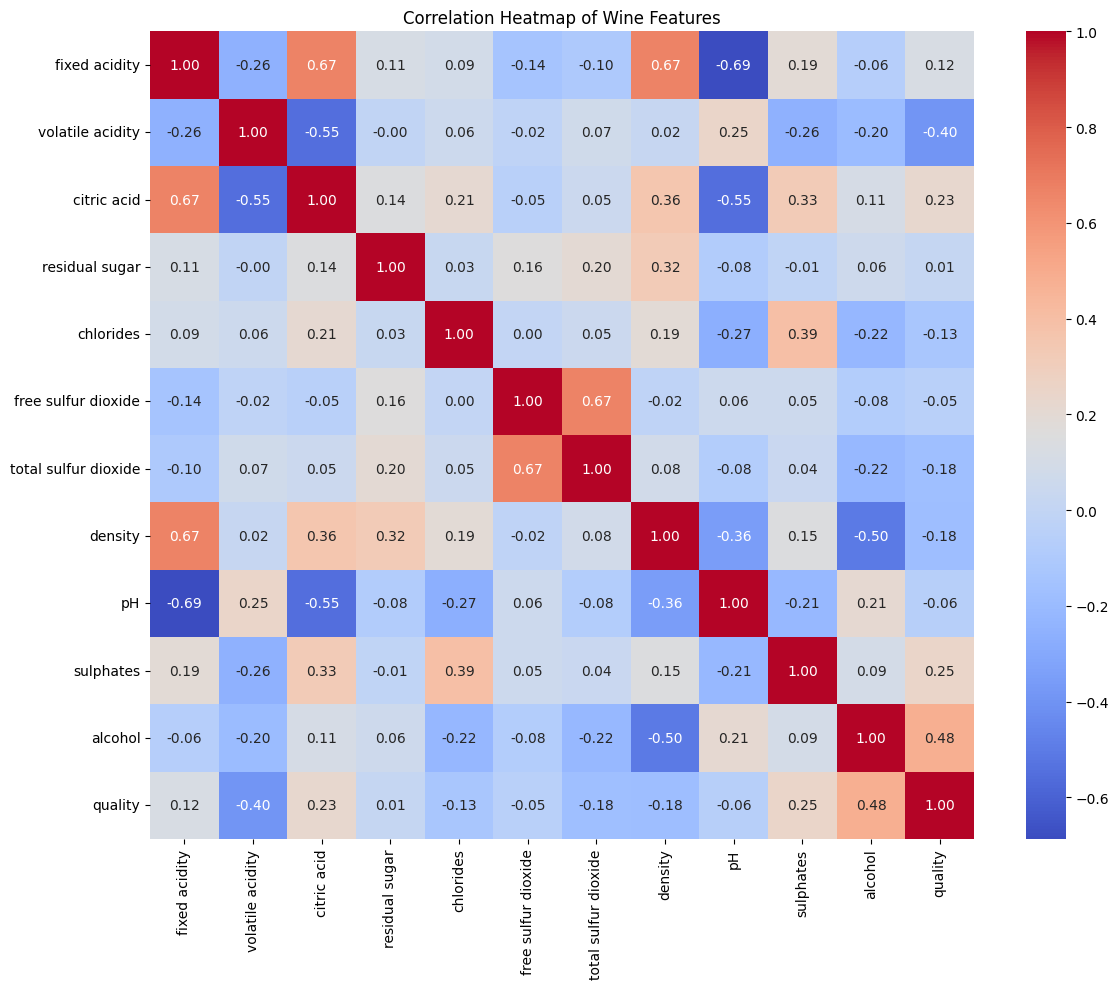

In [53]:
# For all numerical columns
# Correlation heatmap
plt.figure(figsize=(12, 10))
numeric_cols = wine_data.select_dtypes(include=[np.number]).columns
sns.heatmap(wine_data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Wine Features")
plt.tight_layout()
plt.show()

In [54]:
# Bonus Interactive Plotly Visualization
plt.figure(figsize=(10, 8))
px.scatter_3d(
    wine_data,
    x="alcohol",
    y="volatile acidity",
    z="citric acid",
    color="quality_category",
    title="3D Scatter Plot of Wine Features",
    labels={
        "alcohol": "Alcohol (%)",
        "volatile acidity": "Volatile Acidity",
        "citric acid": "Citric Acid",
    },
).show()

<Figure size 1000x800 with 0 Axes>

### Preprocessing
#### Train-Test Split

In [55]:
from sklearn.model_selection import train_test_split

y = wine_data.pop("quality_category")
X = wine_data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts())

X_train shape: (1087, 12)
X_test shape: (272, 12)
y_train shape: (1087,)
y_test shape: (272,)

Class distribution in training set:
quality_category
low       512
medium    428
high      147
Name: count, dtype: int64


In [56]:
# All features are numerical in this dataset
X_train_num = X_train
X_test_num = X_test

#### Numerical Preprocessing

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Imputing
simple = SimpleImputer(strategy="mean").set_output(transform="pandas")
simple.fit(X_train_num)
X_train_num = simple.transform(X_train_num)
X_test_num = simple.transform(X_test_num)

# Scaling
standard = StandardScaler().set_output(transform="pandas")
standard.fit(X_train_num)
X_train_num_preproc = standard.transform(X_train_num)
X_test_num_preproc = standard.transform(X_test_num)
X_train_num_preproc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1027,-1.106561,1.467632,-1.385140,-0.241822,-0.466668,1.175607,0.161942,-1.577906,1.146644,-0.808455,1.062081,-0.755617
371,-0.248703,-1.611915,0.641507,-0.741556,-0.644795,-0.462398,-0.646364,-0.010219,0.064808,1.203165,-1.584384,0.454038
537,-0.134321,1.634094,-0.169151,-0.325111,-0.090621,-1.040517,-1.005611,0.258221,0.382995,0.628416,0.240765,0.454038
493,0.208822,0.885015,0.185512,0.424491,-0.051037,0.693841,1.030123,1.868858,1.083007,0.455992,1.062081,0.454038
443,0.952299,-0.502168,1.097503,0.174624,-0.229164,-0.462398,-0.825988,-0.224971,-0.507928,-0.176231,1.062081,1.663693
...,...,...,...,...,...,...,...,...,...,...,...,...
316,0.723537,0.163680,-0.219818,0.757647,0.265635,2.042786,1.359433,1.546730,-0.062467,-0.061282,-0.306780,-0.755617
1440,-0.649036,-0.890579,0.236178,-0.408400,-0.526044,-0.076985,-0.556552,-1.083977,-0.507928,0.398517,0.788309,1.663693
919,0.037250,0.496604,-0.777145,-0.574978,-0.328124,2.139139,-0.017681,-0.901438,0.446633,1.318114,1.244596,0.454038
1532,-0.649036,-0.002782,-0.726479,-0.408400,-0.605211,0.212075,-0.736176,-0.530992,-0.635203,0.111143,-0.489295,0.454038


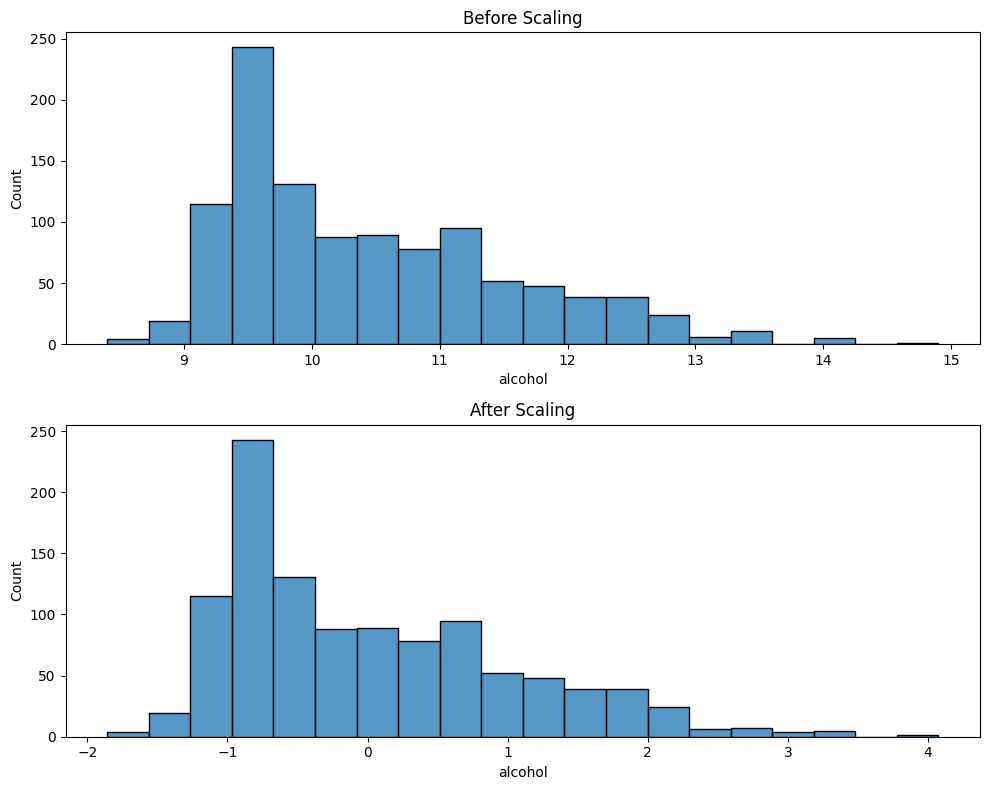

In [58]:
# Bonus : Vérifions que la distribution est inchangée
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
sns.histplot(X_train_num, x="alcohol", ax=ax[0])
ax[0].set_title("Before Scaling")
sns.histplot(X_train_num_preproc, x="alcohol", ax=ax[1])
ax[1].set_title("After Scaling")
plt.tight_layout()
plt.show()

#### Categorical preprocessing

In [59]:
# No categorical features in this dataset, skip this step
print("No categorical features to process")

No categorical features to process


#### Combine cat & num cols

In [60]:
X_train_final = X_train_num_preproc
X_test_final = X_test_num_preproc
X_test_final

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
69,-0.191512,0.968246,-1.131809,-0.491689,-0.288540,-0.751458,-0.825988,-0.278659,0.192083,1.662963,0.058250,0.454038
59,-0.591846,-0.779605,0.185512,-0.075244,-0.288540,-0.655105,-0.017681,-0.278659,0.637545,-0.693505,-0.945582,0.454038
418,2.038919,-0.835092,1.198835,-0.408400,0.641682,-0.847811,-0.796050,1.546730,-0.444291,0.570941,-0.033008,0.454038
117,-0.305893,0.163680,-0.777145,-0.408400,-0.130204,-0.847811,-0.556552,0.150845,0.382995,-0.923404,-0.945582,0.454038
1502,-0.591846,0.302398,-0.473148,-0.075244,-0.209372,-0.076985,0.401440,-0.182020,0.001171,-0.693505,-0.580552,-0.755617
...,...,...,...,...,...,...,...,...,...,...,...,...
177,-0.477465,-0.058269,0.742840,-0.158533,-0.031245,-0.751458,-0.257180,0.258221,1.719381,-0.291181,0.058250,0.454038
674,1.409823,-0.724117,0.692174,-0.241822,-0.090621,-0.847811,-0.885862,0.902475,-1.462490,0.053668,-1.036839,0.454038
1138,-0.477465,-0.668630,-0.625147,1.007514,0.305219,1.271960,1.419307,0.612561,-1.080665,-0.463606,-1.219354,-0.755617
379,-0.019940,-0.613143,0.540175,0.008045,0.107299,0.790194,0.401440,0.634036,0.001171,0.226092,0.332022,0.454038


###

### Training Models

We will discriminate our models based on their accuracy score.

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$
$$ Accuracy = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions} $$

#### Baseline Model

In [61]:
display(y_test.value_counts())
dominant_class = y_test.value_counts().idxmax()
dominant_count = y_test.value_counts().max()
total_count = len(y_test)
print(f"{dominant_class} is the dominant class, we will predict it and compute accuracy")
print(f"Baseline Accuracy is {round(dominant_count / total_count, 2)}")

quality_category
low       128
medium    107
high       37
Name: count, dtype: int64

low is the dominant class, we will predict it and compute accuracy
Baseline Accuracy is 0.47


#### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logi = LogisticRegression(max_iter=1000)
logi.fit(X_train_final, y_train)
y_pred = logi.predict(X_test_final)
score = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {score:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        37
         low       1.00      1.00      1.00       128
      medium       1.00      1.00      1.00       107

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272



#### K-Nearest Neighbors Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_final, y_train)
y_pred = knn.predict(X_test_final)
score = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {score:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

KNN Accuracy: 0.9081

Classification Report:
              precision    recall  f1-score   support

        high       0.94      0.81      0.87        37
         low       0.94      0.94      0.94       128
      medium       0.87      0.91      0.89       107

    accuracy                           0.91       272
   macro avg       0.91      0.88      0.90       272
weighted avg       0.91      0.91      0.91       272



#### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_final, y_train)
y_pred = rf.predict(X_test_final)
score = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {score:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        37
         low       1.00      1.00      1.00       128
      medium       1.00      1.00      1.00       107

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272



#### XGBoost Classifier

In [65]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss')
xgb.fit(X_train_final, y_train)
y_pred = xgb.predict(X_test_final)
score = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {score:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ModuleNotFoundError: No module named 'xgboost'

### Re-Train on Whole Data & Save Model

We will use an amazing sklearn package called `Pipeline` to chain all the preprocessing steps along with the model training step. This will help us to easily reproduce the same steps during inference time.

In [ ]:
X_train.head(2)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, make_column_selector(dtype_include="number"))
])
preprocessor

In [ ]:
preprocessor.fit(X_train)
X_train_preproc = preprocessor.transform(X_train)
X_test_preproc = preprocessor.transform(X_test)

In [ ]:
# Train the best performing model (adjust based on results above)
rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final.fit(X_train_preproc, y_train)
y_pred = rf_final.predict(X_test_preproc)
score = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {score:.4f}")

In [ ]:
import joblib

if not os.path.exists("../models"):
    os.makedirs("../models")

joblib.dump(preprocessor, "../models/wine_preprocessor.joblib")
joblib.dump(rf_final, "../models/wine_random_forest_model.joblib")
print("✅ Models saved successfully!")

In [ ]:
# If I had to load it back later
preprocessor_loaded = joblib.load("../models/wine_preprocessor.joblib")
rf_loaded = joblib.load("../models/wine_random_forest_model.joblib")

rf_loaded.predict(X_test_preproc)

In [ ]:
print(f"Preprocessor size: {os.path.getsize('../models/wine_preprocessor.joblib')} bytes")
print(f"Model size: {os.path.getsize('../models/wine_random_forest_model.joblib')} bytes")